# Analyse des dialogues dans _L'Avare_ de Molière

## Préparation des données

Le texte de _l'Avare_ est disponible sur le site de [l'Observatoire de la vie littéraire (OBVIL)](http://obvil.sorbonne-universite.site/obvil/presentation).
Pour cette analyse, je prends la [version XML/TEI](http://dramacode.github.io/moliere/moliere_avare.xml).

Pour préparer les données, il faudra donc :
* récupérer le texte au format XML ;
* compter le nombre de mots de chaque tirade, et mettre le résultat dans une base de données, autrement dit un _dataframe_ sous pandas ;
* utiliser ce _dataframe_ pour l'analyse.

Je commence par importer les bibliothèques Python :

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xml

Comme dans un exercice précédent, je ne récupère le texte de la pièce que s'il n'est pas déjà disponible localement :

In [2]:
data_url = "http://dramacode.github.io/moliere/moliere_avare.xml"
data_file = "moliere_avare.xml"

import os
import urllib.request
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)

Pour naviguer dans le document XML, j'utilise un objet _ElementTree_ de la bibliothèque _xml_. Il faut d'abord obtenir la racine de cet _ElementTree_ :

In [3]:
import xml.etree.ElementTree as ET
tree = ET.parse(data_file)
root = tree.getroot()

Tous les éléments du documents XML sont préfixés par le _namespace_ `{http://www.tei-c.org/ns/1.0}`

In [4]:
print(root.tag)

{http://www.tei-c.org/ns/1.0}TEI


Création d'un dictionnaire des **rôles** avec identifiants et noms en langage courant :

In [5]:
roles = {element.get('{http://www.w3.org/XML/1998/namespace}id'): element.text
         for element in root.iter("{http://www.tei-c.org/ns/1.0}role")}
print(roles)

{'harpagon': 'Harpagon', 'cleante': 'Cléante', 'elise': 'Élise', 'valere': 'Valère', 'mariane': 'Mariane', 'anselme': 'Anselme', 'frosine': 'Frosine', 'maitre-simon': 'Maitre Simon', 'maitre-jacques': 'Maitre Jacques', 'la-fleche': 'La Flèche', 'dame-claude': 'Dame Claude', 'brindavoine': 'Brindavoine', 'la-merluche': 'La Merluche', 'commissaire': 'Le commissaire'}


Pour savoir qui joue dans les scènes, nous allons compter le nombre de mots pour chaque rôle.

Il existe cependant, dans les indications scéniques (didascalies), une liste des rôles que nous pouvons afficher :

In [6]:
for scene in root.findall(".//{http://www.tei-c.org/ns/1.0}div2"):
    print(scene.get('{http://www.w3.org/XML/1998/namespace}id'), scene[1].text)

I01 Valère, Élise
I02 Cléante, Élise
I03 Harpagon, La Flèche
I04 Élise, Cléante, Harpagon
I05 Valère, Harpagon, Élise
II01 Cléante, La Flèche
II02 Maître Simon, Harpagon, Cléante, La Flèche
II03 Frosine, Harpagon
II04 La Flèche, Frosine
II05 Harpagon, Frosine
III01 Harpagon, Cléante, Élise, Valère, Dame Claude, Maître Jacques, Brindavoine, La Merluche
III02 Maître Jacques, Valère
III03 Frosine, Mariane, Maître Jacques
III04 Mariane, Frosine
III05 Harpagon, Frosine, Mariane
III06 Élise, Harpagon, Mariane, Frosine
III07 Cléante, Harpagon, Élise, Mariane, Frosine
III08 Harpagon, Mariane, Frosine, Cléante, Brindavoine, Élise
III09 Harpagon, Mariane, Cléante, Élise, Frosine, La Merluche
IV01 Cléante, Mariane, Élise, Frosine
IV02 Harpagon, Cléante, Mariane, Élise, Frosine
IV03 Harpagon, Cléante
IV04 Maître Jacques, Harpagon, Cléante
IV05 Cléante, Harpagon
IV06 La Flèche, Cléante
IV07 
            
V01 Harpagon, Le Commissaire, son Clerc
V02 Maître Jacques, Harpagon, Le Commissaire, son Clerc

Liste des rôles dans chaque scène, à partir des _prises de parole_ :

In [11]:
# dictionnaire scènes / rôles :
roles_par_scenes ={scene.get('{http://www.w3.org/XML/1998/namespace}id'):
               {sp.get('who') for sp in scene.findall("./{http://www.tei-c.org/ns/1.0}sp")}
               for sp in scene.findall("./{http://www.tei-c.org/ns/1.0}sp")
               for scene in root.findall(".//{http://www.tei-c.org/ns/1.0}div2")}

AttributeError: 'str' object has no attribute 'findall'

In [10]:
# affichage :
for scene in roles_par_scenes:
    print(scene, end=' ')
    for role in roles_par_scenes[scene]:
        print(roles[role], end=', ')
    print()

I01 Élise, Valère, 
I02 Élise, Cléante, 
I03 Harpagon, La Flèche, 
I04 Élise, Harpagon, Cléante, 
I05 Élise, Harpagon, Valère, 
II01 La Flèche, Cléante, 
II02 Maitre Simon, Cléante, Harpagon, La Flèche, 
II03 Frosine, Harpagon, 
II04 Frosine, La Flèche, 
II05 Frosine, Harpagon, 
III01 Élise, Harpagon, Cléante, Valère, La Merluche, Brindavoine, Maitre Jacques, 
III02 Maitre Jacques, Valère, 
III03 Frosine, Maitre Jacques, 
III04 Mariane, Frosine, 
III05 Frosine, Harpagon, 
III06 Mariane, Frosine, Élise, Harpagon, 
III07 Harpagon, Cléante, Frosine, Valère, Mariane, 
III08 Brindavoine, Harpagon, 
III09 Harpagon, Valère, La Merluche, Cléante, 
IV01 Mariane, Frosine, Élise, Cléante, 
IV02 Élise, Harpagon, Cléante, 
IV03 Harpagon, Cléante, 
IV04 Maitre Jacques, Harpagon, Cléante, 
IV05 Harpagon, Cléante, 
IV06 Cléante, La Flèche, 
IV07 Harpagon, 
V01 Harpagon, Le commissaire, 
V02 Maitre Jacques, Harpagon, Le commissaire, 
V03 Maitre Jacques, Harpagon, Valère, 
V04 Élise, Harpagon, Frosine, 

Différences entre les indications scéniques et les prises de paroles :

* Certains personnages ne parlent pas (exemples : au III-01, Dame Claude ne parle pas, au III-05, Mariane ne parle pas)
* Valère prend la parole alors qu'il n'est pas annoncé aux scènes III-07 et III-09.
* Scène IV-07 : Harpagon est seul, il n'y a pas d'indication de scène.
Cette vérification nous permet de voir qu'il faut se fier aux prises de paroles, mais pas aux indications de scènes.

Pour compter le nombre de mots, il nous faut une fonction qui élimine tous les séparateurs (ponctuation, saut à la ligne, tirets, etc.).
Une succession de plusieurs séparateurs sera comptée comme un unique espace, pour que le nombre de mots soit correctement calculé.

In [12]:
def compte_mots(texte):
    SEPARATEURS = """\n\t .?!,;:-_'"()[]{}+*/=<>"""
    nbMots = 0
    sepAvant = True
    for c in texte:
        if c in SEPARATEURS:
            sepAvant = True
        else:
            if sepAvant == True:
                nbMots += 1
            sepAvant = False
    return nbMots

Comparons le décompte brutal du nombre de mots avec cette fonction.
Pour la première phrase, par exemple, un `split` direct donne 24 mots, car il compte le « ? » final, ce que ne fait pas la fonction `compte_mots`.

In [13]:
for sentence in root.iter("{http://www.tei-c.org/ns/1.0}s"):
    if sentence.text:
        print(sentence.text, len(sentence.text.split()), compte_mots(sentence.text))

Hé quoi, charmante Élise, vous devenez mélancolique, après les obligeantes assurances que vous avez eu la bonté de me donner de votre foi ? 24 23
Je vous vois soupirer, hélas, au milieu de ma joie ! 11 10
Est-ce du regret, dites-moi, de m'avoir fait heureux ? et vous repentez-vous de cet engagement où mes feux ont pu vous contraindre ?  23 25
Non, Valère, je ne puis pas me repentir de tout ce que je fais pour vous.  16 16
Je m'y sens entraîner par une trop douce puissance, et je n'ai pas même la force de souhaiter que les choses ne fussent pas.  24 26
Mais, à vous dire vrai, le succès me donne de l'inquiétude ; et je crains fort de vous aimer un peu plus que je ne devrais.  26 26
Hé que pouvez-vous craindre, Élise, dans les bontés que vous avez pour moi ? 14 14
Hélas ! cent choses à la fois : L'emportement d'un Père ; les reproches d'une Famille ; les censures du monde ; mais plus que tout, Valère, le changement de votre cœur ; et cette froideur criminelle dont ceux de votre Sexe payen

Ah ! mon Père. 4 3
Pourquoi ce cri ?  4 3
Est-ce le mot, ma Fille, ou la chose, qui vous fait peur ?  13 13
Le mariage peut nous faire peur à tous deux, de la façon que vous pouvez l'entendre ; et nous craignons que nos sentiments ne soient pas d'accord avec votre choix.  30 31
Un peu de patience.  4 4
Ne vous alarmez point.  4 4
Je sais ce qu'il faut à tous deux ; et vous n'aurez ni l'un, ni l'autre, aucun lieu de vous plaindre de tout ce que je prétends faire.  28 31
Et pour commencer par un bout ; avez-vous vu, dites moi, une jeune Personne appelée Mariane, qui ne loge pas loin d'ici ?  23 23
Oui, mon Père.  3 3
Et vous ?  3 2
J'en ai ouï parler.  4 5
Comment, mon Fils, trouvez-vous cette Fille ?  7 7
Une fort charmante Personne.  4 4
Sa physionomie ?  3 2
Toute honnête, et pleine d'esprit.  5 6
Son air, et sa manière ?  6 5
Admirables, sans doute.  3 3
Ne croyez-vous pas, qu'une Fille comme cela, mériterait assez que l'on songeât à elle ?  15 17
Oui, mon Père.  3 3
Que ce serait un

Ôte-toi de mes yeux, coquin, ôte-toi de mes yeux. 9 11
Qui est plus criminel, à votre avis, ou celui qui achète un argent dont il a besoin, ou bien celui qui vole un argent dont il n'a que faire ?  30 30
Retire-toi, te dis-je, et ne m'échauffe pas les oreilles.  9 12
Je ne suis pas fâché de cette aventure ; et ce m'est un avis de tenir l'œil, plus que jamais, sur toutes ses actions.  24 25
Monsieur… 1 1
Attendez un moment.  3 3
Je vais revenir vous parler, Il est à propos que je fasse un petit tour à mon argent. 18 18
L'Aventure est tout à fait drôle 6 7
 Il faut bien qu'il ait quelque part un ample magasin de hardes ; car nous n'avons rien reconnu au Mémoire que nous avons. 23 24
Hé c'est toi, mon pauvre la Flèche !  8 8
D'où vient cette rencontre ?  5 5
Ah, ah, c'est toi, Frosine, que viens-tu faire ici ?  10 11
Ce que je fais partout ailleurs ; m'entremettre d'affaires, me rendre serviable aux gens, et profiter du mieux qu'il m'est possible des petits talents que je puis avoir.  28 

Cela me fend le cœur, de les voir ainsi exténués : car enfin j'ai une tendresse pour mes Chevaux, qu'il me semble que c'est moi-même, quand je les vois pâtir ; je m'ôte tous les jours pour eux les choses de la bouche ; et c'est être, Monsieur, d'un naturel trop dur, que de n'avoir nulle pitié de son prochain.  60 65
Le travail ne sera pas grand, d'aller jusqu'à la foire.  10 12
Non, Monsieur, je n'ai pas le courage de les mener, et je ferais conscience de leur donner des coups de fouet en l'état où ils sont.  26 28
Comment voudriez-vous qu'ils traînassent un Carrosse, qu'ils ne peuvent pas se traîner eux-mêmes ?  14 17
Monsieur, j'obligerai le voisin le Picard, à se charger de les conduire : aussi bien nous fera-t-il ici besoin pour apprêter le souper.  23 25
Soit. 1 1
J'aime mieux encore qu'ils meurent sous la main d'un autre, que sous la mienne.  14 17
Maître Jacques fait bien le raisonnable.  6 6
Monsieur l'Intendant fait bien le nécessaire.  6 7
Paix. 1 1
Monsieur, je ne saurais so

Dis-lui que je suis empêché, et qu'il revienne une autre fois.  11 13
Il dit qu'il vous apporte de l'argent.  7 9
Je vous demande pardon.  4 4
Je reviens tout à l'heure.  5 6
Monsieur… 1 1
Ah, je suis mort ! 5 4
Qu'est-ce, mon Père ?  4 5
Vous êtes-vous fait mal ?  5 5
Le traître assurément a reçu de l'argent de mes Débiteurs, pour me faire rompre le cou.  16 17
Cela ne sera rien.  4 4
Monsieur, je vous demande pardon, je croyais bien faire d'accourir vite.  11 12
Que viens-tu faire ici, Bourreau ?  6 6
Vous dire que vos deux Chevaux sont déferrés.  8 8
Qu'on les mène promptement chez le Maréchal.  7 8
En attendant qu'ils soient ferrés, je vais faire pour vous, mon Père, les honneurs de votre Logis, et conduire Madame dans le Jardin, où je ferai porter la collation.  29 30
Valère, aie un peu l'œil à tout cela ; et prends soin, je te prie, de m'en sauver le plus que tu pourras, pour le renvoyer au marchand.  28 29
C'est assez.  2 3
Ô fils impertinent, as-tu envie de me ruiner ! 9 9
Rent

Quel bruit fait-on là-haut ? est-ce mon voleur qui y est ?  12 13
De grâce, si l'on sait des nouvelles de mon voleur, je supplie que l'on m'en dise.  16 19
N'est-il point caché là parmi vous ?  7 8
Ils me regardent tous, et se mettent à rire.  9 9
Vous verrez qu'ils ont part, sans doute, au vol que l'on m'a fait.  13 16
Allons vite, des Commissaires, des Archers, des Prévôts, des Juges, des Gênes, des Potences et des Bourreaux.  17 17
Je veux faire pendre tout le monde ; et si je ne retrouve mon argent, je me pendrai moi-même après.  20 20
Laissez-moi faire.  2 3
Je sais mon métier, Dieu merci.  6 6
Ce n'est pas d'aujourd'hui que je me mêle de découvrir des vols ; et je voudrais avoir autant de sacs de mille francs, que j'ai fait pendre de personnes.  29 32
Tous les Magistrats sont intéressés à prendre cette affaire en main ; et si l'on ne me fait retrouver mon argent, je demanderai justice de la Justice.  27 27
Il faut faire toutes les poursuites requises.  7 7
Vous dites qu'il y avai

Nous passâmes à Gênes, où ma Mère alla ramasser quelques malheureux restes d'une succession qu'on avait déchirée ; et de là, fuyant la barbare injustice de ses Parents, elle vint en ces lieux, où elle n'a presque vécu que d'une vie languissante.  42 45
Ô Ciel ! quels sont les traits de ta puissance ! et que tu fais bien voir qu'il n'appartient qu'à toi de faire des miracles. 25 26
Embrassez-moi, mes Enfants, et mêlez tous deux vos transports à ceux de votre Père.  14 15
Vous êtes notre Père ?  5 4
C'est vous que ma mère a tant pleuré ?  9 9
Oui ma Fille, oui mon Fils, je suis D. Thomas d'Alburcy, que le Ciel garantit des ondes avec tout l'argent qu'il portait, et qui vous ayant tous crus morts durant plus de seize ans, se préparait après de longs voyages, à chercher dans l'hymen d'une douce et sage Personne, la consolation de quelque nouvelle Famille.  55 60
Le peu de sûreté que j'ai vu pour ma vie, à retourner à Naples, m'a fait y renoncer pour toujours ; et ayant su trouver moyen d'y

Pour créer le _dataframe_, nous allons passer par une liste contenant un dictionnaire pour chaque prise de parole du document XML. Ce dictionnaire indique l'acte, la scène, le rôle et le nombre de mots.

In [17]:
# Données sous forme d'une liste de dictionnaires :
data = []
identifiantsParoles = []
for acte in root.iter("{http://www.tei-c.org/ns/1.0}div1"):
    numeroActe = acte.get('n')
    for scene in acte.iter("{http://www.tei-c.org/ns/1.0}div2"):
        numeroScene = numeroActe + '-' + scene.get('n')
        for paroles in scene.iter("{http://www.tei-c.org/ns/1.0}sp"):
            paroleId = paroles.get('{http://www.w3.org/XML/1998/namespace}id')
            roleId = paroles.get('who')
            nbMots = 0
            for phrase in paroles.iter("{http://www.tei-c.org/ns/1.0}s"):
                if phrase.text:
                    nbMots += compte_mots(phrase.text)
            data.append({'act': numeroActe, 'scene': numeroScene, 'role': roleId, 'mots': nbMots})
            identifiantsParoles.append(paroleId)
############### Pour vérifier la bonne exécution, il est possible d'afficher les données :
#            print("Acte {}, Scène {}, Rôle : {}, nombre de mots : {}".format(numeroActe, numeroScene, roleId, nbMots))

Enregistrons ces données dans un _dataframe_ pour pandas, et vérifions le type des données :

In [18]:
df = pd.DataFrame(data, index=identifiantsParoles)
df.dtypes

act      object
mots      int64
role     object
scene    object
dtype: object

Les données sont agrégées à un niveau supérieur : toutes les phrases d'une prise de parole sont additionnées. Au début, par exemple, Valère prononce 23 + 10 + 25 = 58 mots avant qu'Élise ne parle :

In [19]:
df.head()

act  mots    role scene
I01-1   1    58  valere   1-1
I01-2   1    68   elise   1-1
I01-3   1    14  valere   1-1
I01-4   1    51   elise   1-1
I01-5   1    45  valere   1-1

## Quantité de parole

Nous allons pouvoir commencer l'analyse. Pour s'échauffer, le nombre total de mots : il s'élève à 20 757.

In [16]:
df.mots.sum()

20757

In [33]:
motsParRole = df.groupby(['role']).sum()
motsParRole = motsParRole.sort_values(by=['mots'], ascending=False)
print(motsParRole)

                mots
role                
harpagon        6132
cleante         3341
valere          2693
frosine         2339
maitre-jacques  1672
la-fleche       1496
elise           1067
mariane          919
anselme          517
commissaire      294
maitre-simon     197
la-merluche       47
brindavoine       43


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

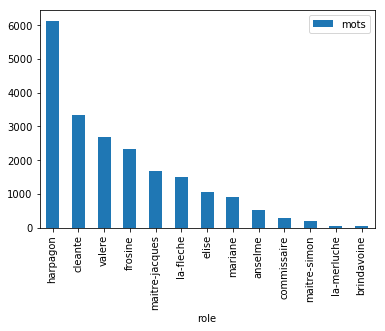

In [34]:
motsParRole.plot.bar(rot=0)
plt.xticks(rotation='vertical')

In [39]:
for role in roles:
    if role in motsParRole.index:
        print(role, "est dans le df")
    else:
        print(role, "n'y est pas")

harpagon est dans le df
cleante est dans le df
elise est dans le df
valere est dans le df
mariane est dans le df
anselme est dans le df
frosine est dans le df
maitre-simon est dans le df
maitre-jacques est dans le df
la-fleche est dans le df
dame-claude n'y est pas
brindavoine est dans le df
la-merluche est dans le df
commissaire est dans le df


In [17]:
df.groupby(['scene', 'role']).sum()

mots
scene role                
1-1   elise            491
      valere           630
1-2   cleante          763
      elise            154
1-3   harpagon         465
      la-fleche        258
1-4   cleante          216
      elise            162
      harpagon        1146
1-5   elise             36
      harpagon         271
      valere           671
2-1   cleante          379
      la-fleche        903
2-2   cleante          127
      harpagon         171
      la-fleche         12
      maitre-simon     197
2-3   frosine            1
      harpagon          21
2-4   frosine          130
      la-fleche        276
2-5   frosine         1482
      harpagon         555
3-1   brindavoine       23
      cleante           76
      elise              3
      harpagon         747
      la-merluche       26
      maitre-jacques   779
...                    ...
4-4   maitre-jacques   300
4-5   cleante          163
      harpagon         129
4-6   cleante           17
      la-fleche         47
4-7   harpagon         407
5-1   commissaire      109
      harpagon          89
5-2   commissaire      159
      harpagon         182
      maitre-jacques   348
5-3   harpagon         441
      maitre-jacques    11
      valere           641
5-4   elise            143
      frosine            4
      harpagon         124
      maitre-jacques     7
      valere            22
5-5   anselme          403
      harpagon         258
      maitre-jacques     7
      mariane          192
      valere           376
5-6   anselme          114
      cleante          130
      commissaire       26
      harpagon          89
      maitre-jacques    23
      mariane           36

[95 rows x 1 columns]

In [19]:
for acte in root.iter("{http://www.tei-c.org/ns/1.0}div1"):
    numeroActe = acte.get('n')
    print(type(numeroActe))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [9]:
for element in root.iter("{http://www.tei-c.org/ns/1.0}div1"):
    print(element[0].text)

Acte Premier
Acte II
Acte III 
Acte IV
Acte V


In [10]:
for element in root.iter("{http://www.tei-c.org/ns/1.0}div2"):
    print(element.attrib)

{'type': 'scene', 'n': '1', '{http://www.w3.org/XML/1998/namespace}id': 'I01'}
{'type': 'scene', 'n': '2', '{http://www.w3.org/XML/1998/namespace}id': 'I02'}
{'type': 'scene', 'n': '3', '{http://www.w3.org/XML/1998/namespace}id': 'I03'}
{'type': 'scene', 'n': '4', '{http://www.w3.org/XML/1998/namespace}id': 'I04'}
{'type': 'scene', 'n': '5', '{http://www.w3.org/XML/1998/namespace}id': 'I05'}
{'type': 'scene', 'n': '1', '{http://www.w3.org/XML/1998/namespace}id': 'II01'}
{'type': 'scene', 'n': '2', '{http://www.w3.org/XML/1998/namespace}id': 'II02'}
{'type': 'scene', 'n': '3', '{http://www.w3.org/XML/1998/namespace}id': 'II03'}
{'type': 'scene', 'n': '4', '{http://www.w3.org/XML/1998/namespace}id': 'II04'}
{'type': 'scene', 'n': '5', '{http://www.w3.org/XML/1998/namespace}id': 'II05'}
{'type': 'scene', 'n': '1', '{http://www.w3.org/XML/1998/namespace}id': 'III01'}
{'type': 'scene', 'n': '2', '{http://www.w3.org/XML/1998/namespace}id': 'III02'}
{'type': 'scene', 'n': '3', '{http://www.w3